# Stock Market Prediction Using Support Vector Regression

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

%matplotlib inline


,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,4-June-2021,1392.00,1396.50,1377.9,1385.20,1386.142576,108272,4901,1.500804e+08,40390.0,37.30,18.60,-6.80
1,3-June-2021,1382.00,1398.65,1377.2,1389.50,1386.545266,243404,12798,3.374907e+08,103459.0,42.50,21.45,7.50
2,2-June-2021,1378.65,1392.00,1362.2,1379.75,1366.888615,1906584,31599,2.606088e+09,1441943.0,75.63,29.80,1.10
3,1-June-2021,1400.00,1400.80,1378.6,1387.40,1385.129123,184134,7222,2.550494e+08,90643.0,49.23,22.20,-12.60
4,31-May-2021,1405.00,1405.00,1383.1,1393.65,1391.983909,1009210,12189,1.404804e+09,813022.0,80.56,21.90,-11.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5291,6-June-2000,8100.00,8195.00,7810.0,7987.65,7981.362707,460220,26395,3.673183e+09,NaN,NaN,385.00,-112.35
5292,5-June-2000,8126.95,8427.95,7820.0,8008.25,8231.584726,394532,20134,3.247624e+09,NaN,NaN,607.95,-118.70
5293,2-June-2000,6990.00,7620.00,6990.0,7525.00,7400.875489,393002,19606,2.908559e+09,NaN,NaN,630.00,535.00
5294,1-June-2000,7525.00,7525.00,7525.0,7525.00,7525.000000,125,1,9.406250e+05,NaN,NaN,0.00,0.00


Getting The data

In [3]:
df =pd.read_csv('infy.csv')
df.Date=pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-06-04,1392.00,1396.50,1377.9,1385.20,1386.142576,108272,4901,1.500804e+08,40390.0,37.30,18.60,-6.80
2021-06-03,1382.00,1398.65,1377.2,1389.50,1386.545266,243404,12798,3.374907e+08,103459.0,42.50,21.45,7.50
2021-06-02,1378.65,1392.00,1362.2,1379.75,1366.888615,1906584,31599,2.606088e+09,1441943.0,75.63,29.80,1.10
2021-06-01,1400.00,1400.80,1378.6,1387.40,1385.129123,184134,7222,2.550494e+08,90643.0,49.23,22.20,-12.60
2021-05-31,1405.00,1405.00,1383.1,1393.65,1391.983909,1009210,12189,1.404804e+09,813022.0,80.56,21.90,-11.35


In [4]:
df.tail()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2000-06-06,8100.00,8195.00,7810.0,7987.65,7981.362707,460220,26395,3.673183e+09,NaN,NaN,385.00,-112.35
2000-06-05,8126.95,8427.95,7820.0,8008.25,8231.584726,394532,20134,3.247624e+09,NaN,NaN,607.95,-118.70
2000-06-02,6990.00,7620.00,6990.0,7525.00,7400.875489,393002,19606,2.908559e+09,NaN,NaN,630.00,535.00
2000-06-01,7525.00,7525.00,7525.0,7525.00,7525.000000,125,1,9.406250e+05,NaN,NaN,0.00,0.00
2000-06-01,6980.00,7125.00,6801.0,6966.80,6997.767878,367971,19245,2.574976e+09,NaN,NaN,324.00,-13.20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5296 entries, 2021-06-04 to 2000-06-01
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open Price                 5296 non-null   float64
 1   High Price                 5296 non-null   float64
 2   Low Price                  5296 non-null   float64
 3   Close Price                5296 non-null   float64
 4   WAP                        5296 non-null   float64
 5   No.of Shares               5296 non-null   int64  
 6   No. of Trades              5296 non-null   int64  
 7   Total Turnover (Rs.)       5296 non-null   float64
 8   Deliverable Quantity       4792 non-null   float64
 9   % Deli. Qty to Traded Qty  4792 non-null   float64
 10  Spread High-Low            5296 non-null   float64
 11  Spread Close-Open          5296 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 537.9 KB


Preprocessing

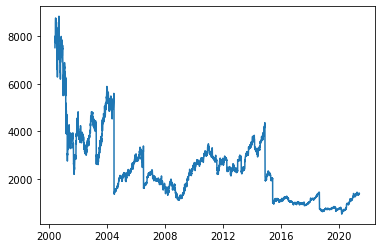

In [6]:
df=df.iloc[::-1]
df['Target']=df['Close Price'].shift(periods=-1)
plt.plot(df.index,df['Target'])

In [24]:
df.tail()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
2021-05-31,1405.00,1405.00,1383.1,1393.65,1391.983909,1009210,12189,1.404804e+09,813022.0,80.56,21.90,-11.35,1387.40
2021-06-01,1400.00,1400.80,1378.6,1387.40,1385.129123,184134,7222,2.550494e+08,90643.0,49.23,22.20,-12.60,1379.75
2021-06-02,1378.65,1392.00,1362.2,1379.75,1366.888615,1906584,31599,2.606088e+09,1441943.0,75.63,29.80,1.10,1389.50
2021-06-03,1382.00,1398.65,1377.2,1389.50,1386.545266,243404,12798,3.374907e+08,103459.0,42.50,21.45,7.50,1385.20
2021-06-04,1392.00,1396.50,1377.9,1385.20,1386.142576,108272,4901,1.500804e+08,40390.0,37.30,18.60,-6.80,NaN


In [25]:
#data Cleaning
df_m=df
df_m=df_m.dropna()
df_m.tail()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
2021-05-28,1411.85,1414.00,1396.35,1404.80,1406.483377,418799,19208,5.890338e+08,238958.0,57.06,17.65,-7.05,1393.65
2021-05-31,1405.00,1405.00,1383.10,1393.65,1391.983909,1009210,12189,1.404804e+09,813022.0,80.56,21.90,-11.35,1387.40
2021-06-01,1400.00,1400.80,1378.60,1387.40,1385.129123,184134,7222,2.550494e+08,90643.0,49.23,22.20,-12.60,1379.75
2021-06-02,1378.65,1392.00,1362.20,1379.75,1366.888615,1906584,31599,2.606088e+09,1441943.0,75.63,29.80,1.10,1389.50
2021-06-03,1382.00,1398.65,1377.20,1389.50,1386.545266,243404,12798,3.374907e+08,103459.0,42.50,21.45,7.50,1385.20


In [9]:
# Data Splitting
x_train,x_test,y_train,y_test=train_test_split(df_m.drop(['Target'],axis='columns'),df_m['Target'],test_size=0.1)

Date
2014-03-28    3278.85
2007-05-21    1946.75
2017-03-09    1020.10
2014-04-11    3260.45
2009-09-25    2287.80
               ...   
2009-07-30    2063.90
2008-12-19    1181.60
2009-03-31    1375.50
2020-04-03     641.10
2010-09-08    2891.30
Name: Target, Length: 4311, dtype: float64

In [10]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [11]:
# Model Initialisation and Fitting
model=SVR(kernel='linear')
model.fit(x_train,y_train)

SVR(kernel='linear')

In [12]:
# Score
model.score(x_test,y_test)

0.965387802360612

In [28]:
pred_y=model.predict(x_test)
pred_y

array([1790.75919405, 1928.4689374 , 3018.22889419, 2215.3308265 ,
       1766.31795151, 2010.42444323, 2784.27376827, 2519.85913027,
       2309.64140211, 4933.95767286, 2387.46592305, 1939.35681321,
       3583.49358333, 2984.54852178, 2396.11555984, 1741.5628454 ,
       2618.5120505 , 2299.47737133,  989.82283102, 1549.69631872,
       1323.80609756,  987.21728067,  775.98955183, 1957.19050325,
        682.64161428, 2511.57077424, 4146.85202978, 1112.1294219 ,
       1829.07159305, 3222.92353905, 2799.50394439, 1807.63695871,
       3122.74159446,  773.22130659, 2353.61826486, 3467.71976981,
       1714.03440254,  809.43431667, 2763.22400751, 2365.65755719,
       2658.62345023,  559.9096012 ,  919.35352936, 2491.41650308,
       1064.73304012,  713.4496658 , 4164.18551421, 1855.24107437,
       3172.96420788, 2742.72461943, 2293.40352229, 1214.04067313,
       1764.36112536,  986.13846728, 2112.09305221,  879.92554624,
        823.15205735, 2005.0007779 , 2513.30640754, 1962.98413

In [14]:
test_e=mean_squared_error(y_test,pred_y,squared=False)
test_e

200.79737317866974

In [15]:
#plt.plot(y_test,pred)

In [16]:
t_pred=model.predict(x_train)

In [17]:
train_e=mean_squared_error(y_train,t_pred,squared=False)
train_e

69.0756978057277

In [18]:
# To predict 5-6-21
t=sc.transform([[1392.00,1396.50,1377.9,1385.20,1386.142576,108272,4901,1.500804e+08,40390.0,37.30,18.60,-6.80]])
model.predict(t)

array([1385.82162569])

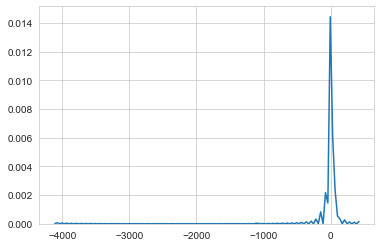

In [19]:
# Difference
delta_y = y_test-pred_y;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

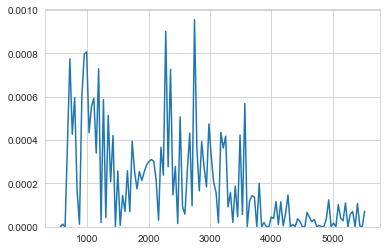

In [20]:
#Plotting
sns.set_style('whitegrid')
sns.kdeplot(np.array(pred_y), bw=0.5)
plt.show()

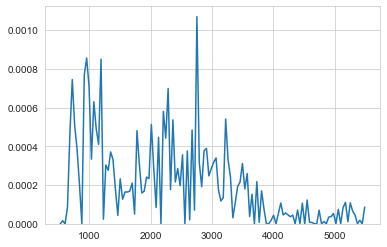

In [21]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test), bw=0.5)
plt.show()

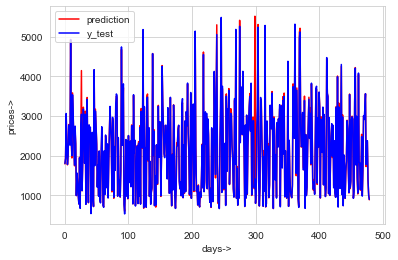

In [22]:
#Predicted vs True Values
# sns.pairplot(df,kind="reg")
plt.plot(pred_y,color='red', label='prediction')
plt.plot(list(y_test),color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.legend(loc='upper left')
plt.show()